In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_parquet('../../data/model_data/model_data_single_output.parquet')

df_mod = df_mod.loc[df_mod['Position'] == 'RB', :].reset_index(drop=True)

df_mod

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score
0,2020,1,patrick mahomes,QB,KC,20.4,1.0,1,306.500000,2.460615,NaN,20.488656,NaN,NaN,0.250000,1.0,31.50,22.00
1,2020,1,lamar jackson,QB,BAL,27.5,2.0,2,222.500000,1.528860,NaN,60.500000,NaN,NaN,0.476190,1.0,27.25,20.25
2,2020,1,dak prescott,QB,DAL,17.6,4.0,3,285.500000,2.495487,NaN,11.517041,NaN,NaN,0.230947,-1.0,25.50,26.50
3,2020,1,russell wilson,QB,SEA,31.8,5.0,4,259.500000,1.564394,NaN,21.500000,NaN,NaN,0.200000,-1.0,NaN,NaN
4,2020,1,deshaun watson,QB,HOU,20.8,6.0,5,275.500000,1.574315,NaN,30.512870,NaN,NaN,0.344828,-1.0,22.00,31.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2023,17,taylor heinicke,QB,ATL,15.1,52.0,28,203.494463,1.304627,0.510823,10.504409,NaN,NaN,0.153846,-1.0,18.25,20.75
2001,2023,17,cj beathard,QB,JAX,9.5,54.0,29,214.495591,1.351543,0.567442,10.500000,NaN,NaN,0.133333,1.0,20.75,17.25
2002,2023,17,sam howell,QB,WAS,6.7,59.0,30,234.500000,1.394584,0.639448,12.501128,NaN,NaN,0.153846,1.0,17.25,31.25
2003,2023,17,bailey zappe,QB,NE,12.1,71.0,31,195.500000,0.615610,0.616228,5.489177,NaN,NaN,0.058824,-1.0,12.75,27.25


In [2]:
X = df_mod[[
    'Rank',
    'Position Rank',
    'Location',
    'Team Projected Score',
    'Opponent Projected Score',
    'Adjusted Receptions Projection',
    'Adjusted Receiving Yards Projection',
    'Adjusted Rushing Yards Projection',
    'Anytime Touchdown Probability',
]].copy()

X

,Rank,Position Rank,Location,Team Projected Score,Opponent Projected Score,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Anytime Touchdown Probability
0,1.0,1,1.0,31.50,22.00,306.500000,2.460615,NaN,20.488656,0.250000
1,2.0,2,1.0,27.25,20.25,222.500000,1.528860,NaN,60.500000,0.476190
2,4.0,3,-1.0,25.50,26.50,285.500000,2.495487,NaN,11.517041,0.230947
3,5.0,4,-1.0,NaN,NaN,259.500000,1.564394,NaN,21.500000,0.200000
4,6.0,5,-1.0,22.00,31.50,275.500000,1.574315,NaN,30.512870,0.344828
...,...,...,...,...,...,...,...,...,...,...
2000,52.0,28,-1.0,18.25,20.75,203.494463,1.304627,0.510823,10.504409,0.153846
2001,54.0,29,1.0,20.75,17.25,214.495591,1.351543,0.567442,10.500000,0.133333
2002,59.0,30,1.0,17.25,31.25,234.500000,1.394584,0.639448,12.501128,0.153846
2003,71.0,31,-1.0,12.75,27.25,195.500000,0.615610,0.616228,5.489177,0.058824


In [3]:
y = df_mod['Fantasy Points'].copy()

y

0       20.4
1       27.5
2       17.6
3       31.8
4       20.8
        ... 
2000    15.1
2001     9.5
2002     6.7
2003    12.1
2004    13.7
Name: Fantasy Points, Length: 2005, dtype: float64

In [4]:
groups = df_mod['Season'].astype(str) + ' Week ' + df_mod['Week'].astype(str)

groups

0        2020 Week 1
1        2020 Week 1
2        2020 Week 1
3        2020 Week 1
4        2020 Week 1
            ...     
2000    2023 Week 17
2001    2023 Week 17
2002    2023 Week 17
2003    2023 Week 17
2004    2023 Week 17
Length: 2005, dtype: object

In [5]:
df_folds = pd.read_parquet('../../data/model_data/folds.parquet')

df_folds

,Fold ID,Season Week
0,0,2022 Week 3
1,0,2021 Week 7
2,0,2021 Week 1
3,0,2023 Week 16
4,0,2021 Week 11
...,...,...
62,2,2020 Week 15
63,2,2023 Week 14
64,2,2021 Week 5
65,2,2022 Week 6


In [6]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.mode.chained_assignment = None

# splitter = GroupKFold(n_splits=3)

cv_data = []
# for is_indexes, oos_indexes in splitter.split(X=X, y=y, groups=groups):
for fold in df_folds['Fold ID'].unique():
    oos_season_week = df_folds.loc[df_folds['Fold ID'] == fold, 'Season Week']
    is_indexes = df_mod.loc[~groups.isin(oos_season_week), :].index
    oos_indexes = df_mod.loc[groups.isin(oos_season_week), :].index
    # split
    X_is = X.iloc[is_indexes]
    X_oos = X.iloc[oos_indexes]

    y_is = y.iloc[is_indexes]
    y_oos = y.iloc[oos_indexes]

    groups_is = groups.iloc[is_indexes]
    df_mod_oos = df_mod.iloc[oos_indexes]

    gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=22)
    for train_indexes, val_indexes in gss.split(X=X_is, y=y_is, groups=groups_is):
            X_train = X_is.iloc[train_indexes]
            X_val = X_is.iloc[val_indexes]

            y_train = y_is.iloc[train_indexes]
            y_val = y_is.iloc[val_indexes]

    # impute
    scaler = StandardScaler()
    imputer = IterativeImputer(initial_strategy='median', max_iter=100)

    X_train_fill_na = imputer.fit_transform(scaler.fit_transform(X_train))
    X_train[X_train.columns] = scaler.inverse_transform(X_train_fill_na).copy()
    X_train['Prop Bets Projection'] = (
        X_train['Adjusted Receiving Yards Projection']*0.1 + 
        X_train['Adjusted Receptions Projection']*0.5 + 
        X_train['Adjusted Rushing Yards Projection']*0.1 +
        X_train['Anytime Touchdown Probability']*6
    )

    scaler2 = MinMaxScaler(clip=True)  # maybe normalize and clip instead of standardize?
    scaler3 = StandardScaler()
    X_train[X_train.columns] = scaler3.fit_transform(scaler2.fit_transform(X_train)).copy()

    X_val_fill_na = imputer.transform(scaler.transform(X_val))
    X_val[X_val.columns] = scaler.inverse_transform(X_val_fill_na).copy()
    X_val['Prop Bets Projection'] = (
        X_val['Adjusted Receiving Yards Projection']*0.1 + 
        X_val['Adjusted Receptions Projection']*0.5 + 
        X_val['Adjusted Rushing Yards Projection']*0.1 +
        X_val['Anytime Touchdown Probability']*6
    )

    X_val[X_val.columns] = scaler3.transform(scaler2.transform(X_val)).copy()

    X_oos_fill_na = imputer.transform(scaler.transform(X_oos))
    X_oos[X_oos.columns] = scaler.inverse_transform(X_oos_fill_na).copy()
    X_oos['Prop Bets Projection'] = (
        X_oos['Adjusted Receiving Yards Projection']*0.1 + 
        X_oos['Adjusted Receptions Projection']*0.5 + 
        X_oos['Adjusted Rushing Yards Projection']*0.1 +
        X_oos['Anytime Touchdown Probability']*6
    )

    X_oos[X_oos.columns] = scaler3.transform(scaler2.transform(X_oos)).copy()

    X_train.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_val.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_oos.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)

    cv_data.append((X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos))

for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    print(X_train.shape, X_val.shape, X_oos.shape, y_train.shape, y_val.shape, y_oos.shape, df_mod_oos.shape)

(1102, 6) (215, 6) (688, 6) (1102,) (215,) (688,) (688, 18)
(1150, 6) (211, 6) (644, 6) (1150,) (211,) (644,) (644, 18)
(1129, 6) (203, 6) (673, 6) (1129,) (203,) (673,) (673, 18)


In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.random import set_seed
import numpy as np
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

def build_and_compile_model(input_shape: tuple, hidden_layer_neurons: list, l1s: list, l2s: list, learning_rate: float):
    enable_op_determinism()
    set_seed(22)
    
    inputs = Input(shape=input_shape, name='input')

    h = inputs
    for i, neurons in enumerate(hidden_layer_neurons):
        h = Dense(
            neurons, 
            activation='relu', 
            kernel_initializer=GlorotNormal(seed=22), 
            kernel_regularizer=L1L2(l1=l1s[i], l2=l2s[i]), 
            name=f"hidden_{i+1}"
        )(h)

    outputs = Dense(1, activation=None, kernel_initializer=GlorotNormal(seed=22), name='outputs')(h)

    mod = Model(inputs=inputs, outputs=outputs)

    mod.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mean_absolute_error'])

    return mod

mod = build_and_compile_model(X.shape[1:], [128, 32], [0, 0.01], [0, 0.01], learning_rate=0.001)

mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10)]              0         
                                                                 
 hidden_1 (Dense)            (None, 128)               1408      
                                                                 
 hidden_2 (Dense)            (None, 32)                4128      
                                                                 
 outputs (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [8]:
from sklearn.metrics import root_mean_squared_error
import optuna

def objective(trial, cv_data=cv_data):
# model tuning
    n_hidden_layers = trial.suggest_int(f"n_hidden_layers", 1, 3)

    hidden_layer_neurons = []
    l1s = []
    l2s = []
    for i in range(n_hidden_layers):
        hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(5, 12)]))  # change to (3, 12)
        # hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(4, 9)]))  # bump this up
        l1s.append(trial.suggest_float(f"hidden_layer_{i+1}_l1", 0.0, 0.1))  # change to (0.0, 0.05)
        l2s.append(trial.suggest_float(f"hidden_layer_{i+1}_l2", 0.0, 0.1))  # change to (0.0, 0.20)

    learning_rate = trial.suggest_float(f"learning_rate", 0.01, 0.10)
    batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(10, 16)])
    # batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(4, 12)])  # bump this up

    # cross validation
    y_oos_list = []
    y_pred_list = []
    for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
        # make sure to build mod in loop to prevent history
        mod = build_and_compile_model(X_train.shape[1:], hidden_layer_neurons, l1s, l2s, learning_rate)

        mod.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=500,
            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
            verbose=0,
        )

        y_oos_list.append(y_oos)
        y_pred_list.append(mod.predict(X_oos, verbose=0))

    y_oos_concat = np.concatenate(y_oos_list)
    y_pred_concat = np.concatenate(y_pred_list)

    return root_mean_squared_error(y_oos_concat, y_pred_concat)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=10, multivariate=True, warn_independent_sampling=False))
study.optimize(objective, n_trials=20, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\optuna\_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-10-21 15:59:20,319] A new study created in memory with name: no-name-52065c9c-ab43-49a0-be54-f51d68252e2c


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2024-10-21 16:00:18,739] Trial 0 finished with value: 7.281197097751789 and parameters: {'n_hidden_layers': 1, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.022040451663772567, 'hidden_layer_1_l2': 0.08119509205386867, 'learning_rate': 0.01094741868844976, 'batch_size': 2048}. Best is trial 0 with value: 7.281197097751789.
[I 2024-10-21 16:00:24,685] Trial 1 finished with value: 16.456070609354082 and parameters: {'n_hidden_layers': 3, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.058428964315689495, 'hidden_layer_1_l2': 0.07026355188654519, 'hidden_layer_2_neurons': 128, 'hidden_layer_2_l1': 0.08749277452777171, 'hidden_layer_2_l2': 0.07449320773686179, 'hidden_layer_3_neurons': 256, 'hidden_layer_3_l1': 0.009588460991804116, 'hidden_layer_3_l2': 0.004521011190769353, 'learning_rate': 0.07163458468004151, 'batch_size': 1024}. Best is trial 0 with value: 7.281197097751789.
[I 2024-10-21 16:00:30,566] Trial 2 finished with value: 11.907060754050072 and parameters: {'n

{'n_hidden_layers': 1,
 'hidden_layer_1_neurons': 1024,
 'hidden_layer_1_l1': 0.09525596752458146,
 'hidden_layer_1_l2': 0.024814972248352232,
 'learning_rate': 0.038444536051553346,
 'batch_size': 8192}

7.27901501100281

In [9]:
n_hidden_layers = study.best_params['n_hidden_layers']

hidden_layer_neurons = []
l1s = []
l2s = []
for i in range(n_hidden_layers):
    hidden_layer_neurons.append(study.best_params[f"hidden_layer_{i+1}_neurons"])
    l1s.append(study.best_params[f"hidden_layer_{i+1}_l1"])
    l2s.append(study.best_params[f"hidden_layer_{i+1}_l2"])

learning_rate = study.best_params[f"learning_rate"]
batch_size = study.best_params[f"batch_size"]

y_oos_list = []
y_pred_list = []
testing_data = []
for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    # make sure to build mod in loop to prevent history
    mod = build_and_compile_model(X_train.shape[1:], hidden_layer_neurons, l1s, l2s, learning_rate)

    mod.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1,
    )

    y_preds = mod.predict(X_oos, verbose=0)

    df_preds = pd.DataFrame(
        y_preds,
        columns=['Prediction']
    )

    testing_data.append(pd.concat((df_mod_oos.reset_index(drop=True), df_preds), axis=1))


    y_oos_list.append(y_oos)
    y_pred_list.append(y_preds)

df_test = pd.concat(testing_data, ignore_index=True)

y_oos_concat = np.concatenate(y_oos_list)
y_pred_concat = np.concatenate(y_pred_list)

print(f"OOS RMSE: {root_mean_squared_error(y_oos_concat, y_pred_concat)}")

Epoch 1/500
1/1 [==============================] - 1s 879ms/step - loss: 366.4147 - mean_absolute_error: 16.6294 - val_loss: 248.3021 - val_mean_absolute_error: 12.8013
Epoch 2/500
1/1 [==============================] - 0s 47ms/step - loss: 249.1917 - mean_absolute_error: 12.9527 - val_loss: 163.8526 - val_mean_absolute_error: 9.0665
Epoch 3/500
1/1 [==============================] - 0s 50ms/step - loss: 153.7884 - mean_absolute_error: 8.9087 - val_loss: 158.2055 - val_mean_absolute_error: 8.0595
Epoch 4/500
1/1 [==============================] - 0s 49ms/step - loss: 143.5975 - mean_absolute_error: 7.8645 - val_loss: 169.3567 - val_mean_absolute_error: 8.5876
Epoch 5/500
1/1 [==============================] - 0s 51ms/step - loss: 162.4172 - mean_absolute_error: 8.5149 - val_loss: 123.0241 - val_mean_absolute_error: 7.2680
Epoch 6/500
1/1 [==============================] - 0s 52ms/step - loss: 121.4098 - mean_absolute_error: 7.2312 - val_loss: 95.3429 - val_mean_absolute_error: 6.3453
E

In [10]:
df_test['Prediction'].describe()

count    2005.000000
mean       16.569618
std         3.387216
min         9.071401
25%        13.914704
50%        16.164001
75%        18.843857
max        25.594593
Name: Prediction, dtype: float64

In [11]:
(df_test['Fantasy Points'] - df_test['Prediction']).describe()

count    2005.000000
mean       -0.047324
std         7.280677
min       -20.351245
25%        -4.969120
50%        -0.346914
75%         4.739747
max        24.927928
dtype: float64

In [12]:
(df_test['Fantasy Points'] - df_test['Prediction']).abs().describe()

count    2005.000000
mean        5.802050
std         4.396580
min         0.000989
25%         2.294041
50%         4.876830
75%         8.441216
max        24.927928
dtype: float64

In [13]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(df_test['Fantasy Points'], df_test['Prediction'])

7.27901501100281

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Fantasy Points'], df_test['Prediction'])

5.802050296564649

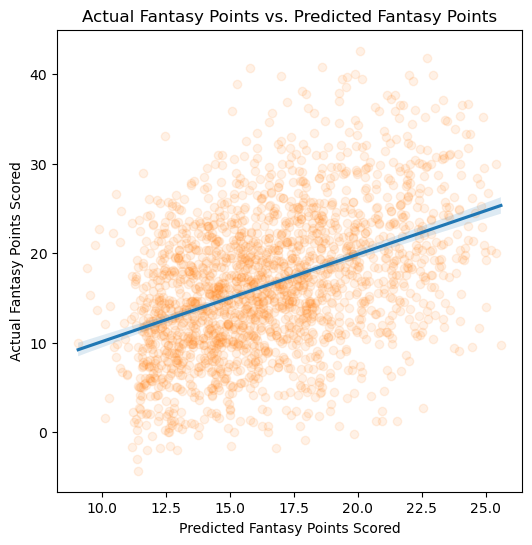

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Fantasy Points',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Fantasy Points vs. Predicted Fantasy Points')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Fantasy Points Scored')

plt.show()

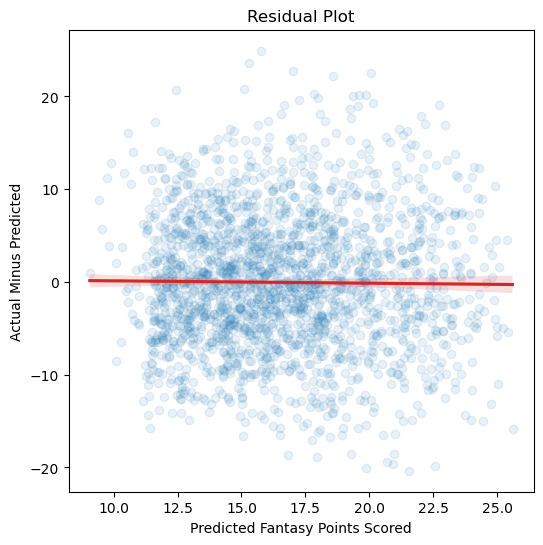

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Fantasy Points'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [17]:
import shap

explainer = shap.DeepExplainer(mod, X_train.to_numpy())

shap_values = explainer(X_train.to_numpy())

shap_values.feature_names = X_train.columns

shap_values.shape

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


(1129, 6, 1)

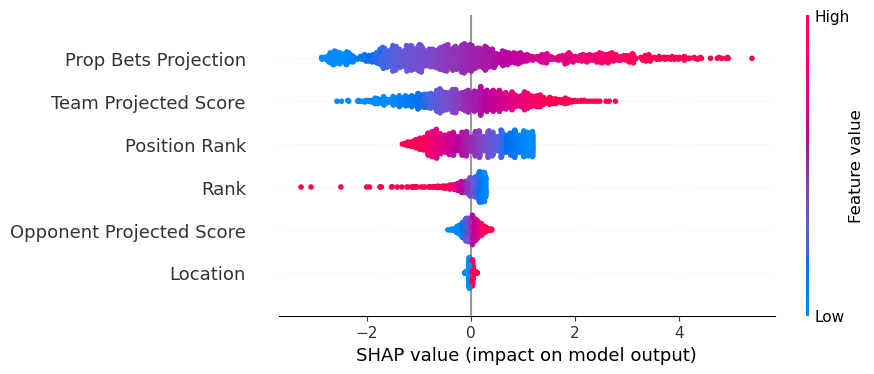

In [18]:
shap.plots.beeswarm(shap_values[:, :, 0], max_display=None)